# Run CVCR ##
Steve Jones 7-22-22

Setup and run CVCR current regulator 

In [1]:
import os
import pathlib as pl
import sys
import time

repo_dir = pl.Path(os.path.dirname(os.getcwd()))
sys.path.append(str(repo_dir / 'AMDC-Firmware' / 'scripts'))

from AMDC import AMDC
from AMDC_Logger import AMDC_Logger, find_mapfile
from AMDC_LivePlot import AMDC_LivePlot

amdc = AMDC()

# After creating the amdc object...

# Set comm defaults for Ethernet
amdc.setup_comm_defaults('eth')

# Init ethernet 
amdc.eth_init()

# Set up the default ASCII command socket
s0, s0_id = amdc.eth_new_socket('ascii_cmd')
amdc.eth_set_default_ascii_cmd_socket(s0)

# Cretae AMDC Logger Object
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)

## Init Hardware ##

- Call function & spin shaft 1 revolution so encoder position is known to system.
- Then call CVCR init to kick off regulator

In [3]:
amdc.cmd('hw enc init')

	> hw enc init
['hw enc init', 'SUCCESS']


['hw enc init', 'SUCCESS']

In [4]:
amdc.cmd('cvcr init')

	> cvcr init
['cvcr init', 'SUCCESS']


['cvcr init', 'SUCCESS']

## Set Loggings to Stream ##

	> log info
	> log empty_all
['log empty_all', 'SUCCESS']
	> log reg 0 LOG_Iu 537542744 250 double
['log reg 0 LOG_Iu 537542744 250 double', 'SUCCESS']
	> log reg 1 LOG_Iv 537542752 250 double
['log reg 1 LOG_Iv 537542752 250 double', 'SUCCESS']
	> log reg 2 LOG_Vdc 537542776 250 double
['log reg 2 LOG_Vdc 537542776 250 double', 'SUCCESS']


<IPython.core.display.Javascript object>


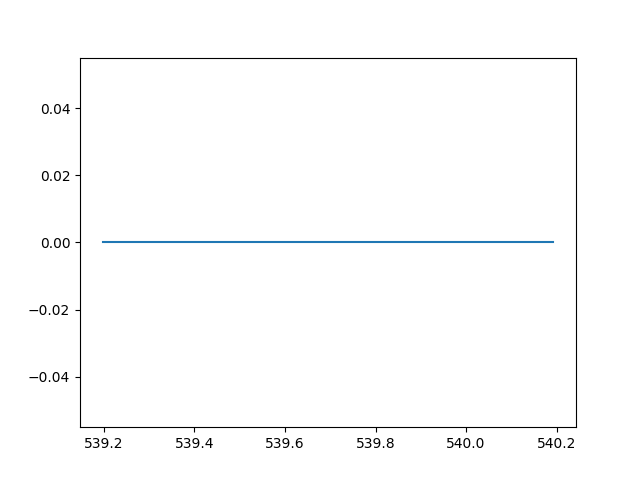

	> log stream start 0 1
['log stream start 0 1', 'SUCCESS']


<IPython.core.display.Javascript object>


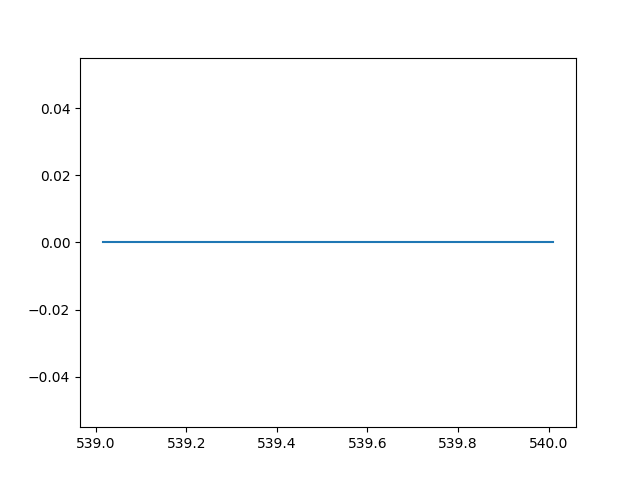

	> log stream start 1 2
['log stream start 1 2', 'SUCCESS']


<IPython.core.display.Javascript object>


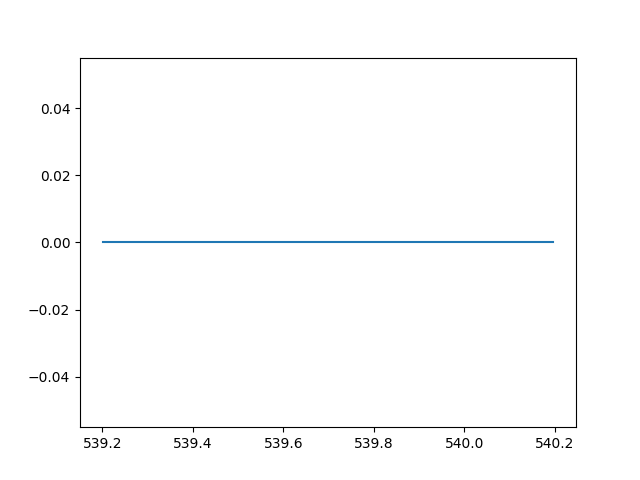

	> log stream start 2 3
['log stream start 2 3', 'SUCCESS']


In [2]:
# Setup Logger
logger.sync()

# Clear log
logger.empty_all()

# Register Vars
logger.register('Iu Iv Vdc', samples_per_sec = 250, var_type = 'double')

# Jupyter notebook command for live plot
%matplotlib notebook

# plot w/ 1,000ms frame update w/ a 0.1s window length
# plot = AMDC_LivePlot(logger, 'Va', window_sec = 1000, 0.1)
p1 = AMDC_LivePlot(logger, 'Iu', window_sec = 1)
p1.start_stream()
p1.show()

p2 = AMDC_LivePlot(logger, 'Iv', window_sec = 1)
p2.start_stream()
p2.show()

p3 = AMDC_LivePlot(logger, 'Vdc', window_sec = 1)
p3.start_stream()
p3.show()

## Stop Streaming Log ##

In [3]:
##### CELL START #####
p1.stop_stream()
p2.stop_stream()
p3.stop_stream()
# p4.stop_stream()

# Return to static inline plots
%matplotlib inline

# Unregister Vars
logger.unregister_all()

	> log stream stop 0 1
['log stream stop 0 1', 'SUCCESS']
	> log stream stop 1 2
['log stream stop 1 2', 'SUCCESS']
	> log stream stop 2 3
['log stream stop 2 3', 'SUCCESS']
	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']


## Command non-zero Currents ##

Be aware there is no speed limit in place! 

In [6]:
amdc.cmd('cvcr Iqc 0.0')
amdc.cmd('cvcr Idc 5.0')

	> cvcr Iqc 0.0
['cvcr Iqc 0.0', 'SUCCESS']
	> cvcr Idc 5.0
['cvcr Idc 5.0', 'SUCCESS']


['cvcr Idc 5.0', 'SUCCESS']

In [8]:
amdc.cmd('cvcr Iqc 5.0')
amdc.cmd('cvcr Idc 0.0')

	> cvcr Iqc 5.0
['cvcr Iqc 5.0', 'SUCCESS']
	> cvcr Idc 0.0
['cvcr Idc 0.0', 'SUCCESS']


['cvcr Idc 0.0', 'SUCCESS']

In [ ]:
amdc.cmd('cvcr Iqc 0.0')
amdc.cmd('cvcr Idc 0.0')

In [ ]:
amdc.cmd('cvcr deinit')